In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

from solardatatools import DataHandler
from solardatatools.signal_decompositions import tl1_l2d2p365 as cvx_sd
from solardatatools.signal_decompositions_l2norm import tl1_l2d2p365 as cvx_sd_l2norm

In [2]:
%load_ext autoreload
%autoreload 2

# New updates:
## - Scale daily energy by max
## - Add periodicity constraint for daily energy decompositions

# Save data in dict

In [3]:
paths = ["./cassandra/*.csv"]

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        # data = df["meas_val_f"] # ac power
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True)
        data = dh.filled_data_matrix
        tc = np.linalg.norm(data[:-2] - 2 * data[1:-1] + data[2:], ord=1, axis=0)
        # Normalize such that the maximum value is equal to one
        tc /= np.nanmax(tc)
        tc = 1 - tc

        # Calculate the daily energy
        de = np.sum(data, axis=0)
        de /= np.nanmax(de) # ADDED SCALING
        
        cassandra_data[f"{fname}_tc"] = tc
        cassandra_data[f"{fname}_de"] = de
        
#         cvx_ss = cvx_sd(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
#         cvx_l2n = cvx_sd_l2norm(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")

#         print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

#         f, ax1, = plt.subplots(1, 1, sharex=True)
#         #ax1.plot(cvx_ss, label="SumSquares")
#         ax1.plot(cvx_l2n, label="L2Norm")
#         ax1.plot(tc);
#         ax1.set_title("l2d2 component")
#         ax1.set_ylim(0.8,1.05)

#         ax1.legend()
#         plt.show()

#         cvx_ss_de = cvx_sd(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
#         cvx_l2n_de = cvx_sd_l2norm(de, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")

#         print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss_de, cvx_l2n_de):.2e}')

#         f, ax1, = plt.subplots(1, 1, sharex=True)
#         #ax1.plot(cvx_ss_de, label="SumSquares")
#         ax1.plot(cvx_l2n_de, label="L2Norm")
#         ax1.plot(de);
#         ax1.set_title("l2d2 component")

#         ax1.legend()
#         plt.show()
        

./cassandra/TACHC1022158.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 17.97 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              9.98s
Cleaning                   6.02s
Filtering/Summarizing      1.97s
    Data quality           0.36s
    Clear day detect       0.54s
    Clipping detect        0.20s
    Capacity change detect 0.87s

./cassandra/TACIC1066981.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 25.52 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              15.86s
Cleaning                   6.87s
Filtering/Summarizing      2.79s
    Data quality           0.49s
    Clear day detect       1.03s
    Clipping detect        0.17s
    Capacity change detect 1.09s

./cassandra/TADKC1095559.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 13.66 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.34s
Cleaning                   6.45s
Filtering/Summarizing      2.87s
    Data quality           0.43s
    Clear day detect       1.45s
    Clipping detect        0.11s
    Capacity change detect 0.87s

./cassandra/TADBC1077912.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 24.56 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              14.50s
Cleaning                   7.15s
Filtering/Summarizing      2.91s
    Data quality           0.51s
    Clear day detect       1.20s
    Clipping detect        0.12s
    Capacity change detect 1.08s

./cassandra/TADKC1094999.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 14.46 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              5.74s
Cleaning                   6.37s
Filtering/Summarizing      2.34s
    Data quality           0.36s
    Clear day detect       0.92s
    Clipping detect        0.12s
    Capacity change detect 0.95s



In [4]:
results = {}

# TC weight optimization

In [6]:
weight_iter = np.logspace(5, 7, 60)

def run(sig):
    mae_list = []
    cvx_l2n = cvx_sd_l2norm(sig, tau=0.9, c1=1e3, yearly_periodic=False, solver="MOSEK")
    
    for w in tqdm(weight_iter):
        res = cvx_sd(sig, tau=0.9, c1=w, yearly_periodic=False, solver="MOSEK")
        mae_list.append(mae(cvx_l2n, res))
        
    return weight_iter[np.argmin(mae_list)], np.min(mae_list), mae_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:09<00:00,  6.30it/s]


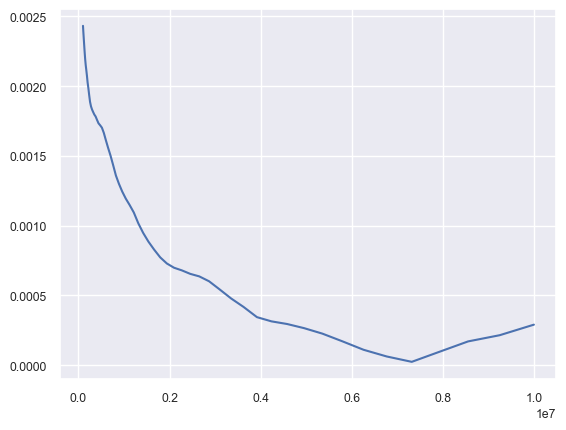

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:11<00:00,  5.16it/s]


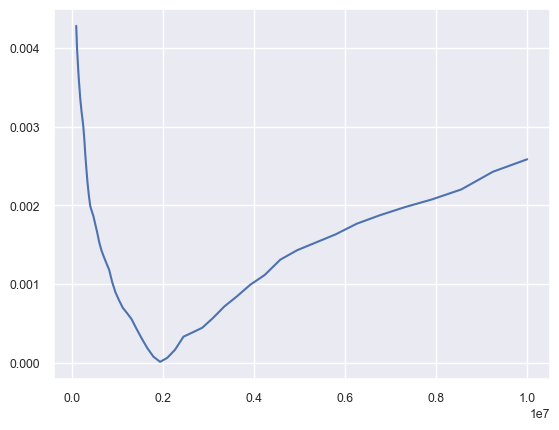

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:10<00:00,  5.49it/s]


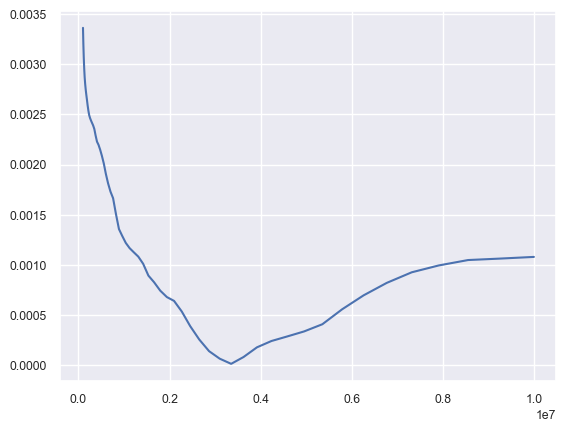

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:11<00:00,  5.18it/s]


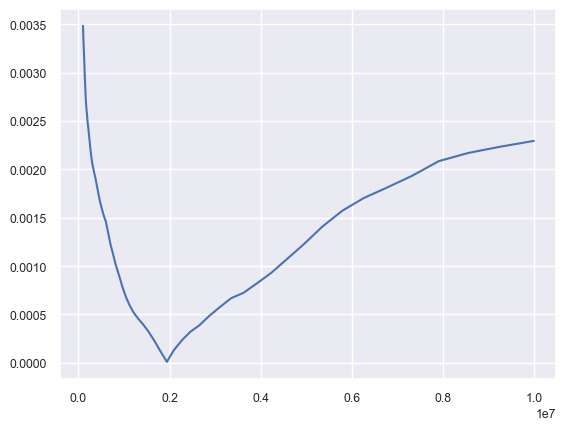

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:09<00:00,  6.05it/s]


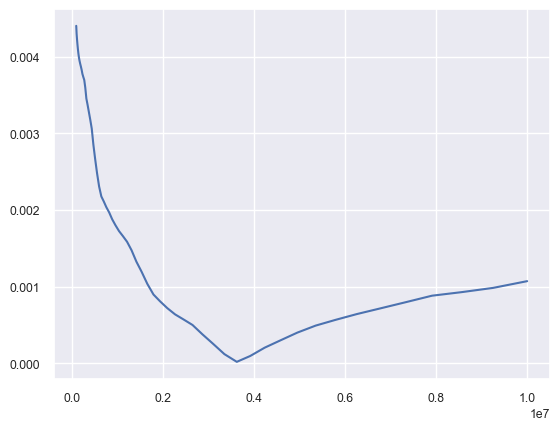

In [44]:
for path in paths:
    for fname in glob.glob(path):
        r = run(cassandra_data[f"{fname}_tc"])
        results[f"{fname}_weight_min_tc"] =  r[0]
        results[f"{fname}_mae_min_tc"] = r[1]
        results[f"{fname}_mae_list_tc"] = r[2]
        plt.plot(weight_iter, results[f"{fname}_mae_list_tc"])
        plt.show()

## TC weighting results

MAE s_hat  (OSD,CVX)   2.40e-05


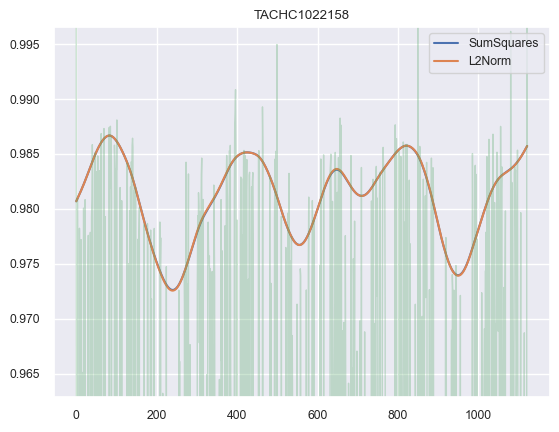

MAE s_hat  (OSD,CVX)   1.18e-05


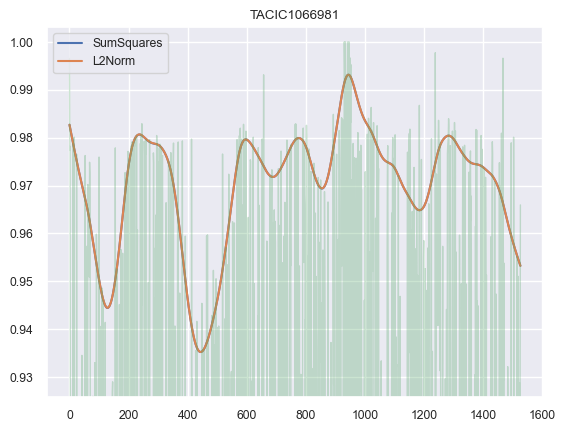

MAE s_hat  (OSD,CVX)   1.34e-05


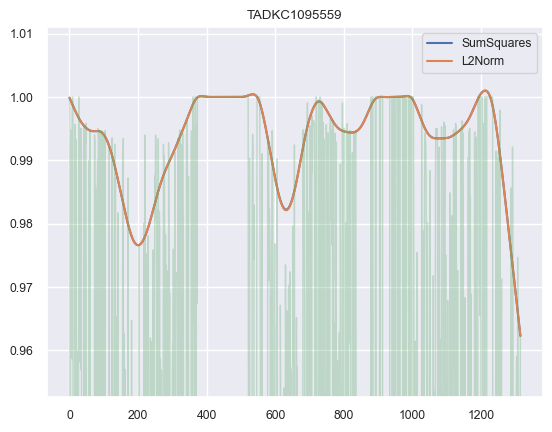

MAE s_hat  (OSD,CVX)   1.04e-05


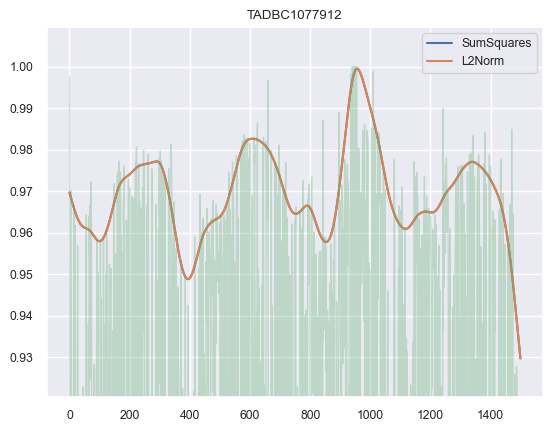

MAE s_hat  (OSD,CVX)   1.83e-05


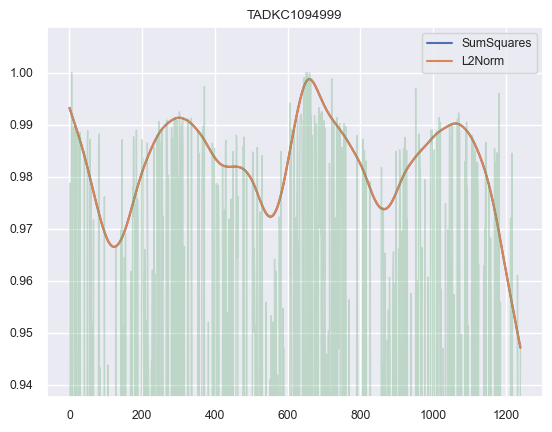

In [150]:
for path in paths:
    for fname in glob.glob(path):
        tc = cassandra_data[f"{fname}_tc"] 
        
        cvx_ss = cvx_sd(tc, tau=0.9, yearly_periodic=False,
                        c1=results[f"{fname}_weight_min_tc"], solver="MOSEK")

        cvx_l2n = cvx_sd_l2norm(tc, tau=0.9, c1=1e3,
                                yearly_periodic=False, solver="MOSEK")

        print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

        f, (ax1) = plt.subplots(1, 1, sharex=True)
        ax1.plot(cvx_ss, label="SumSquares")
        ax1.plot(cvx_l2n, label="L2Norm")
        ax1.plot(tc, alpha=0.3, linewidth=1)
        ax1.set_ylim(min(cvx_ss)*0.99, max(cvx_ss)*1.01)
        ax1.set_title(fname[12:-4])

        ax1.legend()
        plt.show()

# ======================================================

# DE weight optimization, with periodic=True

In [7]:
def run_de(sig):
    
    mae_list = []
    cvx_l2n = cvx_sd_l2norm(sig, tau=0.9, c1=1e3, yearly_periodic=True, solver="MOSEK")
    
    for w in tqdm(weight_iter):
        res = cvx_sd(sig, tau=0.9, c1=w, yearly_periodic=True, solver="MOSEK")
        mae_list.append(mae(cvx_l2n, res))
        
    return weight_iter[np.argmin(mae_list)], np.min(mae_list), mae_list

In [10]:
weight_iter = np.logspace(3, 5.6, 100)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.52it/s]


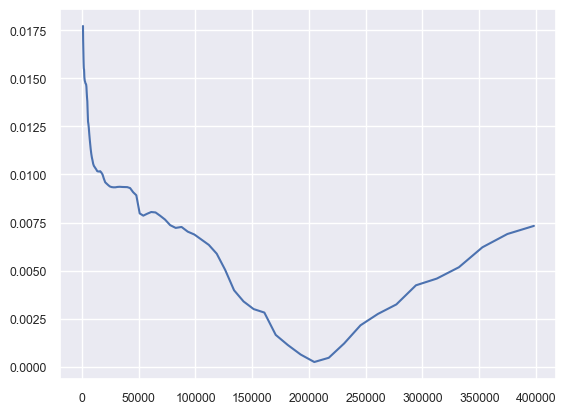

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.63it/s]


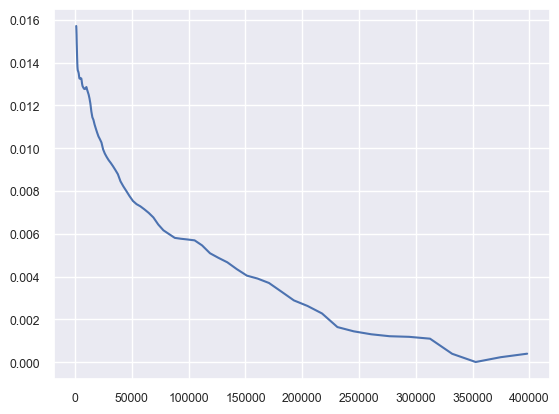

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 12.59it/s]


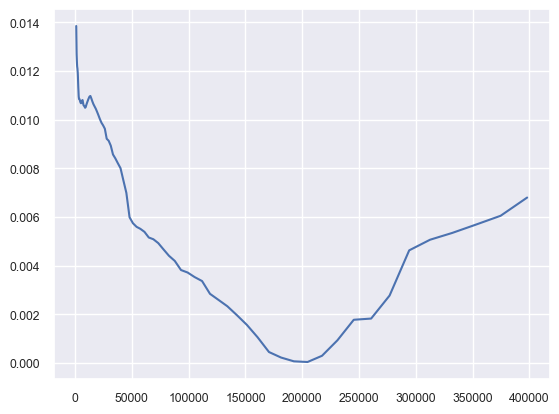

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.69it/s]


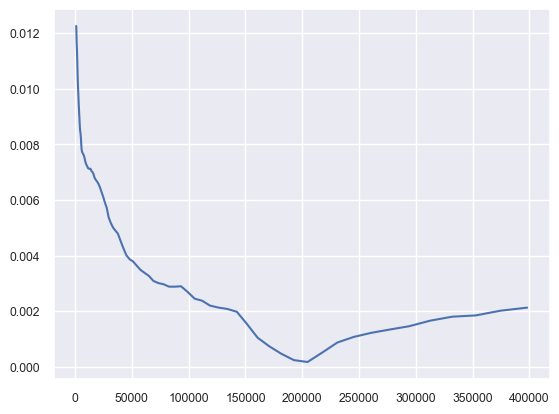

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.03it/s]


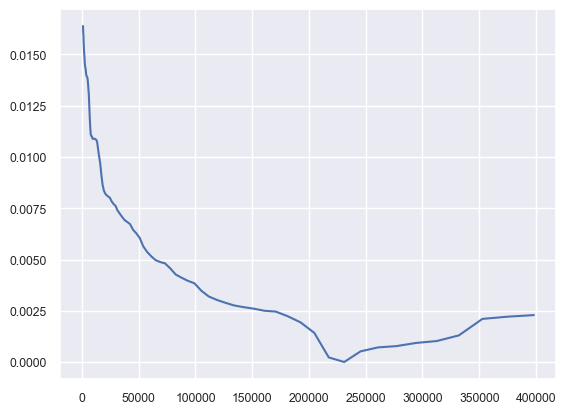

In [11]:
for path in paths:
    for fname in glob.glob(path):
        r = run_de(cassandra_data[f"{fname}_de"])
        results[f"{fname}_weight_min_de"] =  r[0]
        results[f"{fname}_mae_min_de"] = r[1]
        results[f"{fname}_mae_list_de"] = r[2]
        plt.plot(weight_iter, results[f"{fname}_mae_list_de"])
        plt.show()

MAE s_hat  (OSD,CVX)   2.39e-04


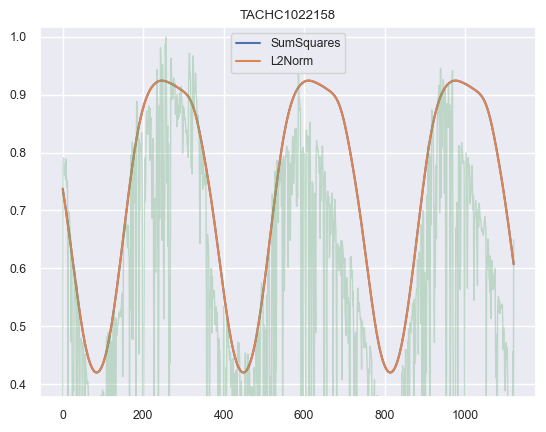

MAE s_hat  (OSD,CVX)   1.15e-05


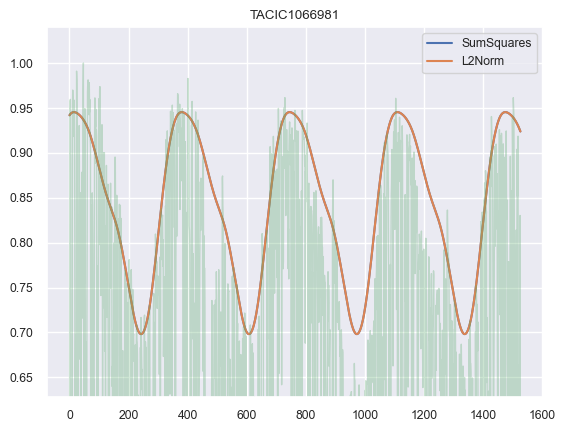

MAE s_hat  (OSD,CVX)   4.11e-05


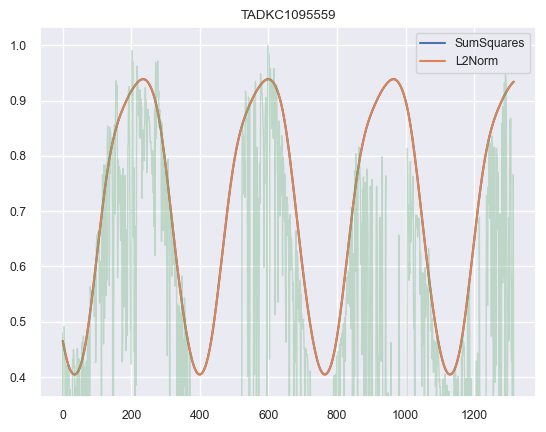

MAE s_hat  (OSD,CVX)   1.71e-04


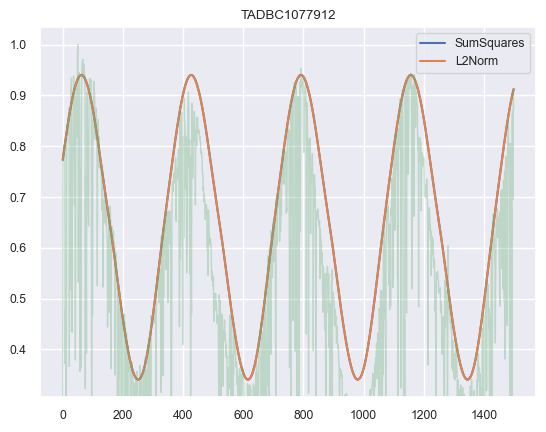

MAE s_hat  (OSD,CVX)   5.25e-06


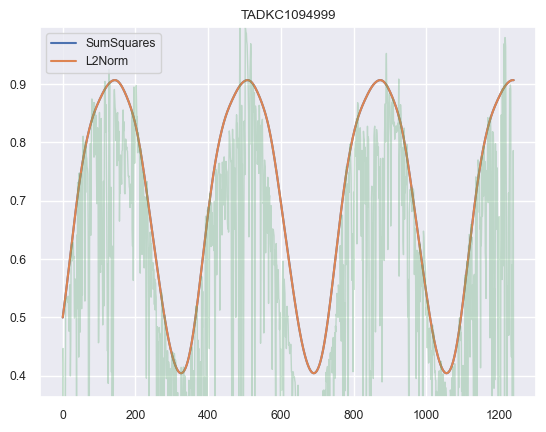

In [12]:
for path in paths:
    for fname in glob.glob(path):
        de = cassandra_data[f"{fname}_de"] 
        
        cvx_ss = cvx_sd(de, tau=0.9, yearly_periodic=True,
                        c1=results[f"{fname}_weight_min_de"], solver="MOSEK")

        cvx_l2n = cvx_sd_l2norm(de, tau=0.9, c1=1e3,
                                yearly_periodic=True, solver="MOSEK")

        print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

        f, (ax1) = plt.subplots(1, 1, sharex=True)
        ax1.plot(cvx_ss, label="SumSquares")
        ax1.plot(cvx_l2n, label="L2Norm")
        ax1.plot(de, alpha=0.3, linewidth=1)
        ax1.set_ylim(min(cvx_ss)*0.9, max(cvx_ss)*1.1)
        ax1.set_title(fname[12:-4])

        ax1.legend()
        plt.show()

### Optimized weights

In [13]:
weights_tc, weights_de = [], []

In [115]:
for path in paths:
    for fname in glob.glob(path):
        print(f'{fname[12:-4]}, new weight: {results[f"{fname}_weight_min_tc"]:.2f}')
        weights_tc.append(results[f"{fname}_weight_min_tc"])

TACHC1022158, new weight: 7318242.22
TACIC1066981, new weight: 1941491.95
TADKC1095559, new weight: 3352924.15
TADBC1077912, new weight: 1941491.95
TADKC1094999, new weight: 3625117.05


In [14]:
for path in paths:
    for fname in glob.glob(path):
        print(f'{fname[12:-4]}, new weight: {results[f"{fname}_weight_min_de"]:.2f}')
        weights_de.append(results[f"{fname}_weight_min_de"])

TACHC1022158, new weight: 204696.83
TACIC1066981, new weight: 352756.27
TADKC1095559, new weight: 204696.83
TADBC1077912, new weight: 204696.83
TADKC1094999, new weight: 231012.97


In [16]:
w_median_de = np.median(weights_de)

In [17]:
w_median_de

204696.827180752

# Testing these weights (TC)

MAE s_hat  (OSD,CVX)   4.78e-04


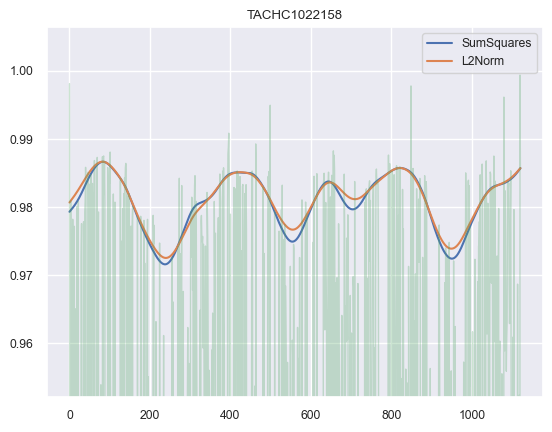

MAE s_hat  (OSD,CVX)   7.16e-04


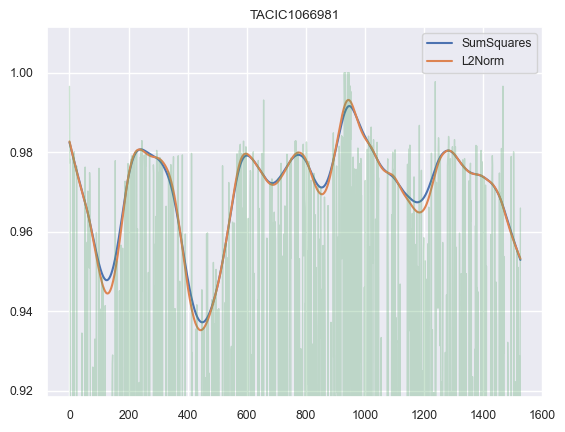

MAE s_hat  (OSD,CVX)   1.34e-05


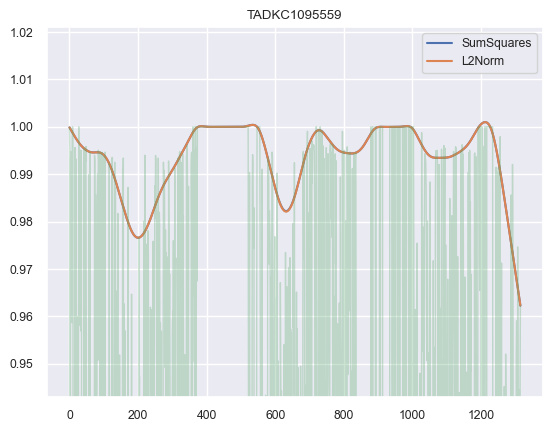

MAE s_hat  (OSD,CVX)   6.68e-04


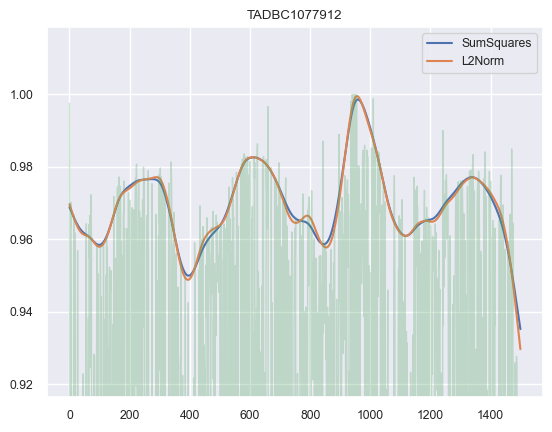

MAE s_hat  (OSD,CVX)   1.19e-04


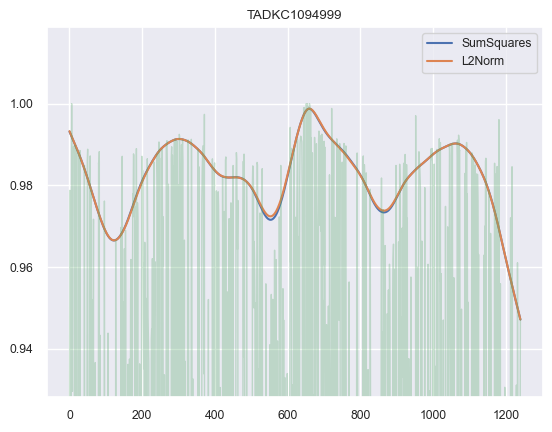

In [146]:
for fname in glob.glob(path):
    
    tc = cassandra_data[f"{fname}_tc"] 
    cvx_ss = cvx_sd(tc, tau=0.9, yearly_periodic=False,
                    c1=3352924.15, solver="MOSEK")

    cvx_l2n = cvx_sd_l2norm(tc, tau=0.9, c1=1e3,
                            yearly_periodic=False, solver="MOSEK")

    print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

    f, (ax1) = plt.subplots(1, 1, sharex=True)
    ax1.plot(cvx_ss, label="SumSquares")
    ax1.plot(cvx_l2n, label="L2Norm")
    ax1.plot(tc, alpha=0.3, linewidth=1)
    ax1.set_ylim(min(cvx_ss)*0.98, max(cvx_ss)*1.02)
    ax1.set_title(fname[12:-4])

    ax1.legend()
    plt.show()

MAE s_hat  (OSD,CVX)   3.82e-04


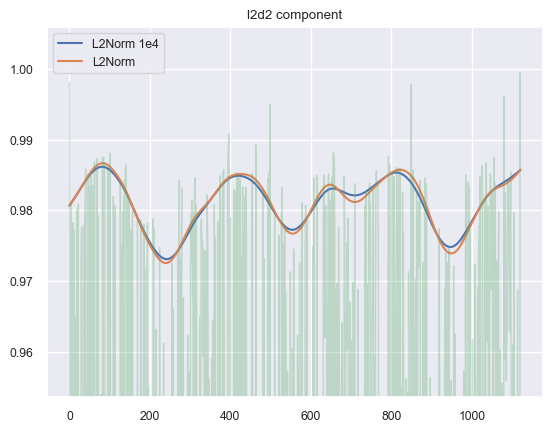

MAE s_hat  (OSD,CVX)   9.69e-04


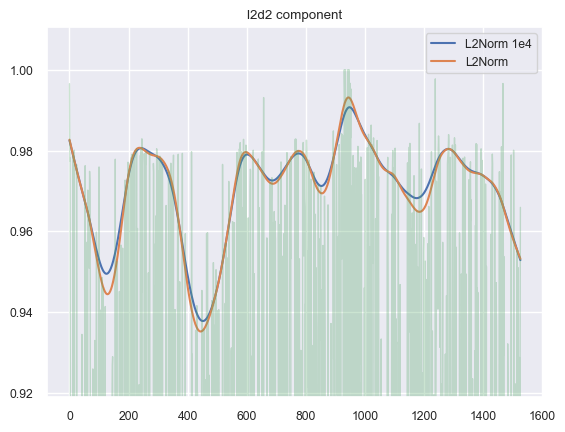

MAE s_hat  (OSD,CVX)   9.55e-04


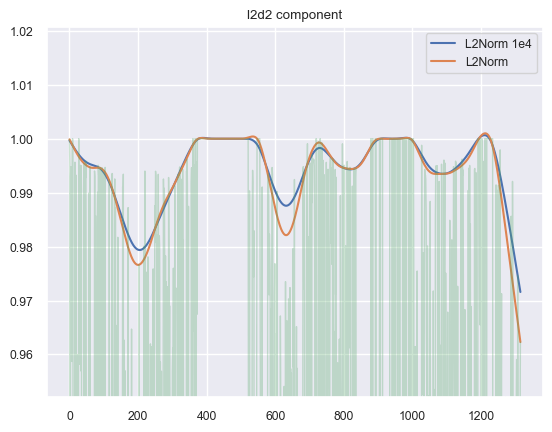

MAE s_hat  (OSD,CVX)   8.17e-04


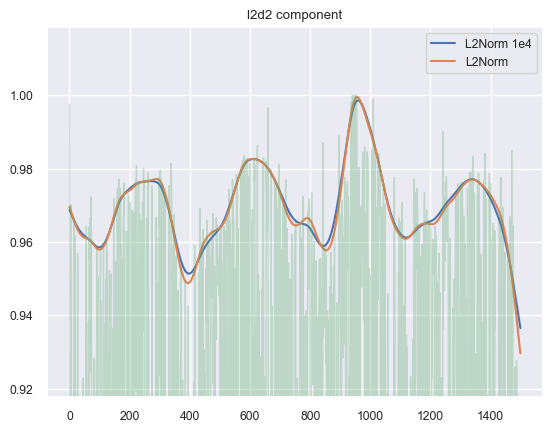

MAE s_hat  (OSD,CVX)   9.39e-04


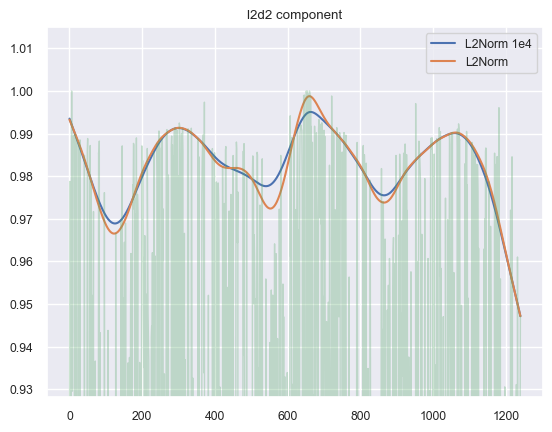

In [107]:
for fname in glob.glob(path):
    
    tc = cassandra_data[f"{fname}_tc"] 
    cvx_l2n_1e4 = cvx_sd_l2norm(tc, tau=0.9, c1=1500,
                            yearly_periodic=False, solver="MOSEK")

    cvx_l2n = cvx_sd_l2norm(tc, tau=0.9, c1=1e3,
                            yearly_periodic=False, solver="MOSEK")

    print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_l2n_1e4, cvx_l2n):.2e}')

    f, (ax1) = plt.subplots(1, 1, sharex=True)
    ax1.plot(cvx_l2n_1e4, label="L2Norm 1e4")
    ax1.plot(cvx_l2n, label="L2Norm")
    ax1.plot(tc, alpha=0.3, linewidth=1)
    ax1.set_ylim(min(cvx_l2n_1e4)*0.98, max(cvx_l2n_1e4)*1.02)
    ax1.set_title("l2d2 component")

    ax1.legend()
    plt.show()

# Testing these weights (DE)

MAE s_hat  (OSD,CVX)   2.39e-04


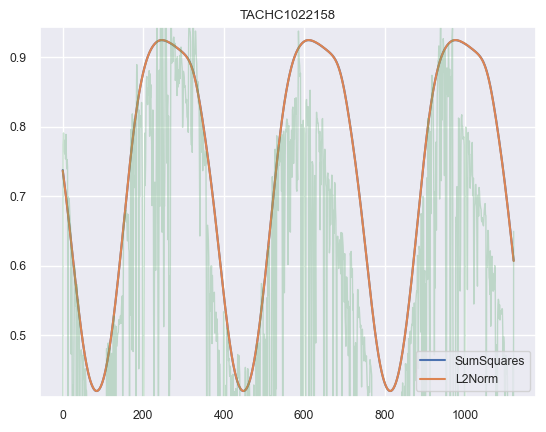

MAE s_hat  (OSD,CVX)   2.63e-03


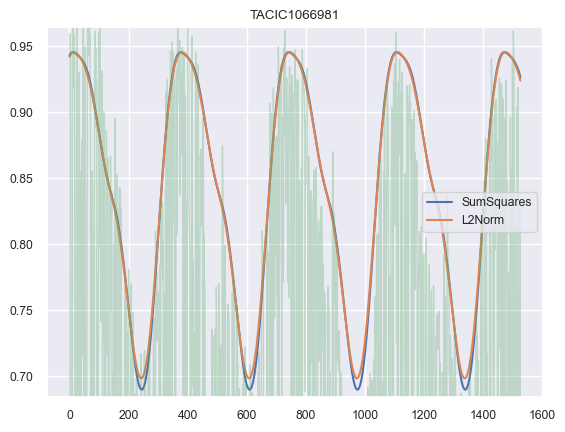

MAE s_hat  (OSD,CVX)   4.11e-05


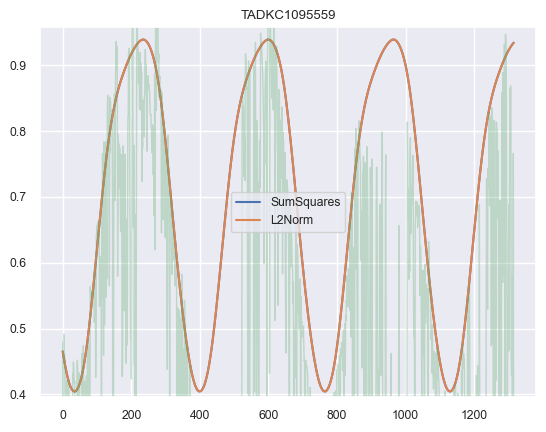

MAE s_hat  (OSD,CVX)   1.71e-04


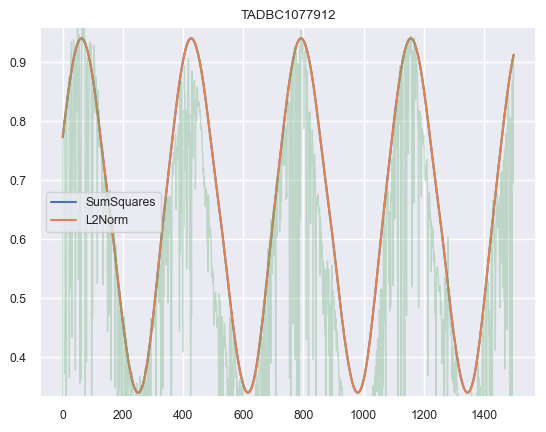

MAE s_hat  (OSD,CVX)   1.43e-03


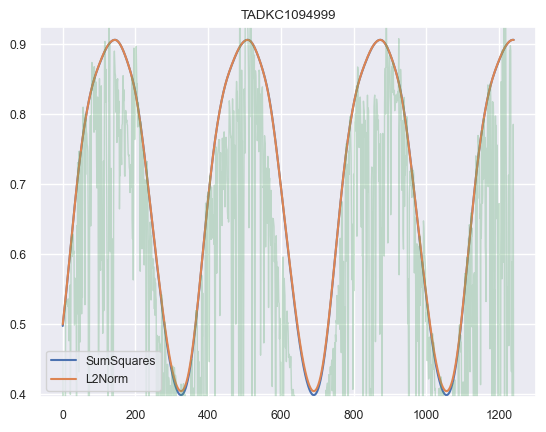

In [18]:
for fname in glob.glob(path):
    
    de = cassandra_data[f"{fname}_de"] 
    cvx_ss = cvx_sd(de, tau=0.9, yearly_periodic=True,
                    c1=w_median_de, solver="MOSEK")

    cvx_l2n = cvx_sd_l2norm(de, tau=0.9, c1=1e3,
                            yearly_periodic=True, solver="MOSEK")

    print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

    f, (ax1) = plt.subplots(1, 1, sharex=True)
    ax1.plot(cvx_ss, label="SumSquares")
    ax1.plot(cvx_l2n, label="L2Norm")
    ax1.plot(de, alpha=0.3, linewidth=1)
    ax1.set_ylim(min(cvx_l2n)*0.98, max(cvx_l2n)*1.02)
    ax1.set_title(fname[12:-4])

    ax1.legend()
    plt.show()

## Check small/large len data with median of found weight for this len

In [19]:
for fname in glob.glob(path):
    print(f'{fname[12:-4]}: len {len(cassandra_data[f"{fname}_tc"])/365:.1f} yrs')


TACHC1022158: len 3.1 yrs
TACIC1066981: len 4.2 yrs
TADKC1095559: len 3.6 yrs
TADBC1077912: len 4.1 yrs
TADKC1094999: len 3.4 yrs


In [169]:
median_weight_tc = np.median(weights_tc)
median_weight_de = np.median(weights_de)

In [170]:
print(median_weight_de, median_weight_tc)

58008.514241665296 3352924.149249553


In [20]:
path = "./cassandra/small_large/*.csv"

In [21]:
for fname in glob.glob(path):
    print(fname)
    df = pd.read_csv(fname)
    dh = DataHandler(df, convert_to_ts=True)
    dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True)
    data = dh.filled_data_matrix
    tc = np.linalg.norm(data[:-2] - 2 * data[1:-1] + data[2:], ord=1, axis=0)
    # Normalize such that the maximum value is equal to one
    tc /= np.nanmax(tc)
    tc = 1 - tc

    # Calculate the daily energy
    de = np.sum(data, axis=0)
    de /= np.nanmax(de) # DIVIDING MY MAX

    cassandra_data[f"{fname}_tc"] = tc
    cassandra_data[f"{fname}_de"] = de

./cassandra/small_large/ZT163185000441C0516_small.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 6.38 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.39s
Cleaning                   3.23s
Filtering/Summarizing      0.76s
    Data quality           0.10s
    Clear day detect       0.14s
    Clipping detect        0.20s
    Capacity change detect 0.32s

./cassandra/small_large/TABA01148025_large.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 34.53 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              22.45s
Cleaning                   8.15s
Filtering/Summarizing      3.93s
    Data quality           0.75s
    Clear day detect       1.52s
    Clipping detect        0.18s
    Capacity change detect 1.48s

./cassandra/small_large/TABJC1027266_large.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 33.69 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              21.50s
Cleaning                   8.24s
Filtering/Summarizing      3.96s
    Data quality           0.72s
    Clear day detect       1.69s
    Clipping detect        0.12s
    Capacity change detect 1.42s

./cassandra/small_large/TABC01142170_cap_ch.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Fix time shift algorithm failed.
Error message: All-NaN slice encountered




Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 429, in run_pipeline
    self.auto_fix_time_shifts(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 964, in auto_fix_time_shifts
    self.time_shift_analysis.run(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/time_shifts.py", line 73, in run
    hn, rn, tv_metric, jpy, best_ix = self.optimize_c1(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/time_shifts.py", line 200, in optimize_c1
    best_ix = subset_ixs[np.nanargmin(hn[subset_ixs])]
  File "<__array_function__ internals>", line 180, in nanargmin
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-packages/numpy/lib/nanfunctions.py", line 553, in nanargmin
    raise ValueError("All-NaN slice encountered")
ValueError: All-NaN slice e

total time: 40.44 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              21.79s
Cleaning                   14.72s
Filtering/Summarizing      3.92s
    Data quality           0.81s
    Clear day detect       1.59s
    Clipping detect        0.12s
    Capacity change detect 1.40s

./cassandra/small_large/TAEKC1077772_cap_ch.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

total time: 11.17 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              3.01s
Cleaning                   7.25s
Filtering/Summarizing      0.91s
    Data quality           0.13s
    Clear day detect       0.24s
    Clipping detect        0.17s
    Capacity change detect 0.37s

./cassandra/small_large/001C4B0008A5_small.csv


/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/time_axis_manipulation.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  delta, count = mode(diff[fltr])
/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_quality.py:60: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Clear day detection failed.


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 364, in run_pipeline
    self.detect_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 986, in detect_clear_days
    clear_days = find_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/clear_day_detection.py", line 55, in find_clear_days
    x = tl1_l2d2p365(de, tau=0.9, c1=1e3, yearly_periodic=False, solver=solver)
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/signal_decompositions.py", line 215, in tl1_l2d2p365
    problem.solve(solver=solver, verbose=verbose)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-packages/cvxpy/problems/problem.py", line 493, in solve
    return solve_func(self, *args, **kwargs)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-dev-sara/lib/python3.10/site-pac

Fix time shift algorithm failed.
Error message: '>=' not supported between instances of 'NoneType' and 'float'


total time: 3.54 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.37s
Cleaning                   0.12s
Filtering/Summarizing      1.04s
    Data quality           0.11s
    Clear day detect       0.41s
    Clipping detect        0.17s
    Capacity change detect 0.35s



Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 418, in run_pipeline
    self.auto_fix_time_shifts(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 960, in auto_fix_time_shifts
    if self.data_clearness_score >= 0.3:
TypeError: '>=' not supported between instances of 'NoneType' and 'float'


In [23]:
median_weight_de = w_median_de

MAE s_hat  (OSD,CVX)   1.36e-02


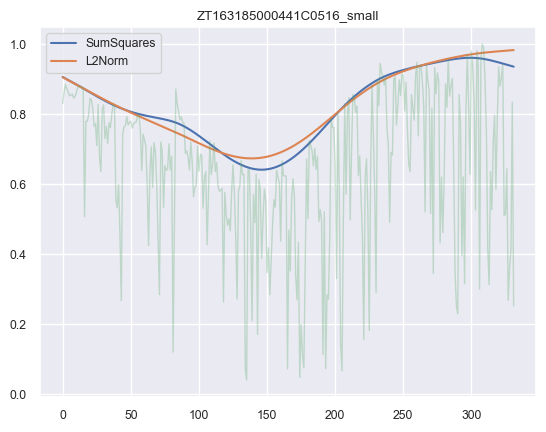

MAE s_hat  (OSD,CVX)   7.33e-04


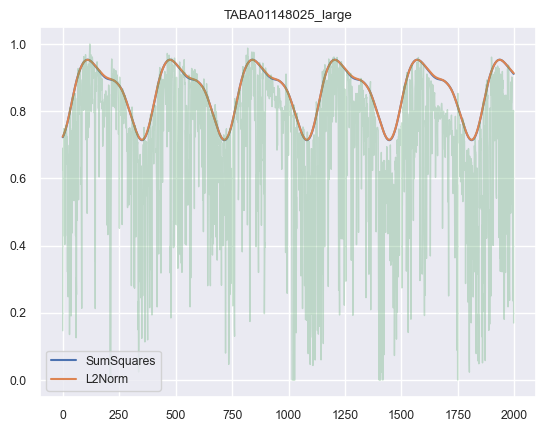

MAE s_hat  (OSD,CVX)   1.35e-03


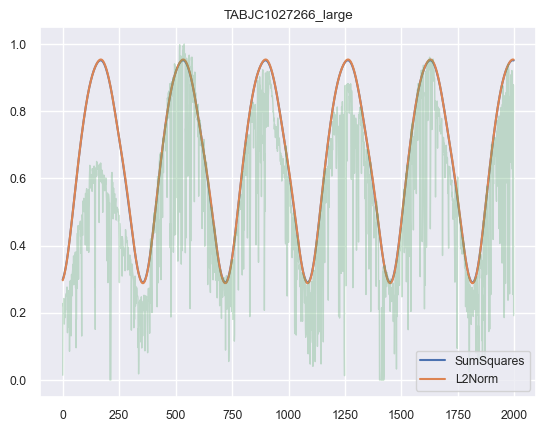

MAE s_hat  (OSD,CVX)   4.61e-03


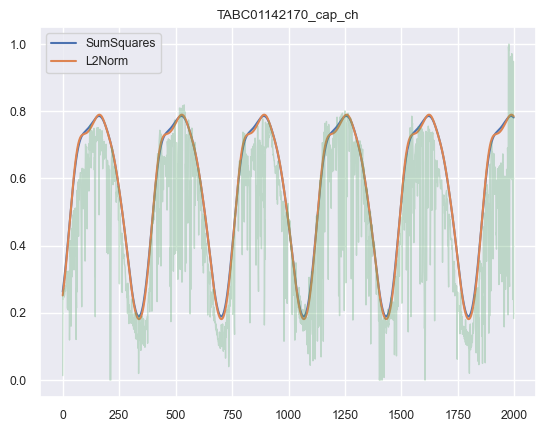

MAE s_hat  (OSD,CVX)   4.03e-03


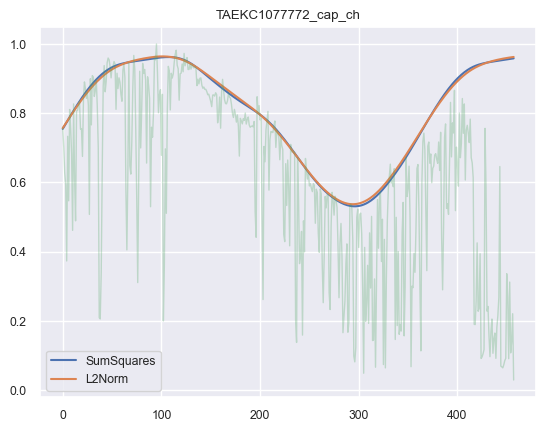

MAE s_hat  (OSD,CVX)   7.69e-03


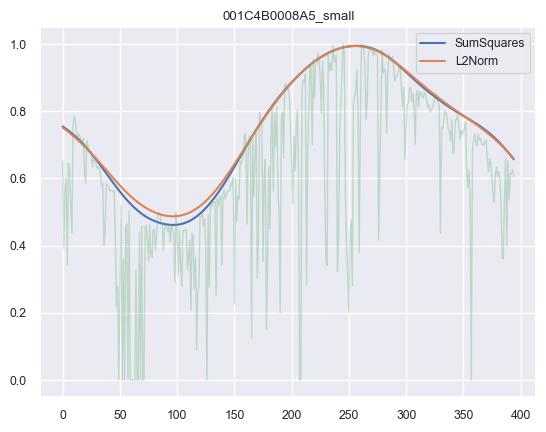

In [24]:
for fname in glob.glob(path):
    de = cassandra_data[f"{fname}_de"] 
        
    cvx_ss = cvx_sd(de, tau=0.9, yearly_periodic=True,
                        c1=median_weight_de, solver="MOSEK")

    cvx_l2n = cvx_sd_l2norm(de, tau=0.9, c1=1e3,
                                yearly_periodic=True, solver="MOSEK")

    print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

    f, (ax1) = plt.subplots(1, 1, sharex=True)
    ax1.plot(cvx_ss, label="SumSquares")
    ax1.plot(cvx_l2n, label="L2Norm")
    ax1.plot(de, alpha=0.3, linewidth=1)
    #ax1.set_ylim(min(cvx_ss)*0.98, max(cvx_ss)*1.02)
    ax1.set_title(fname[24:-4])

    ax1.legend()
    plt.show()

MAE s_hat  (OSD,CVX)   1.86e-03


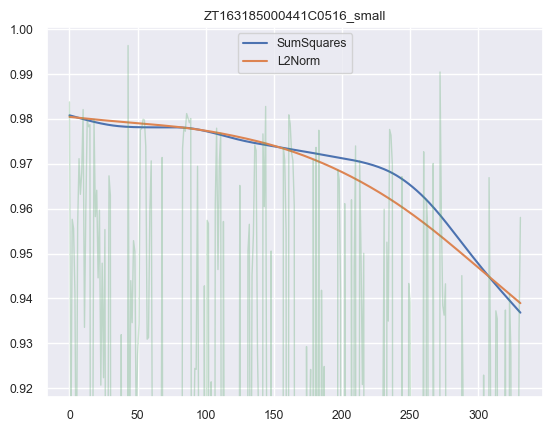

MAE s_hat  (OSD,CVX)   2.94e-04


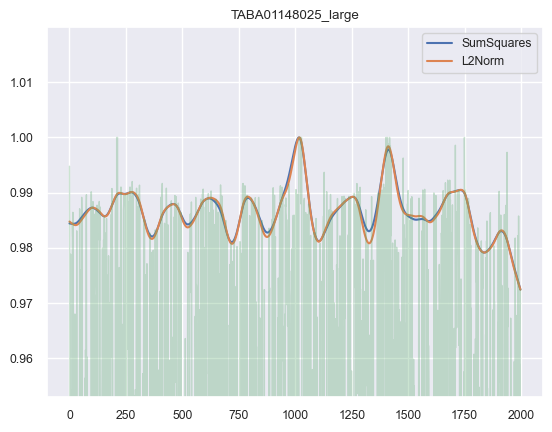

MAE s_hat  (OSD,CVX)   2.22e-05


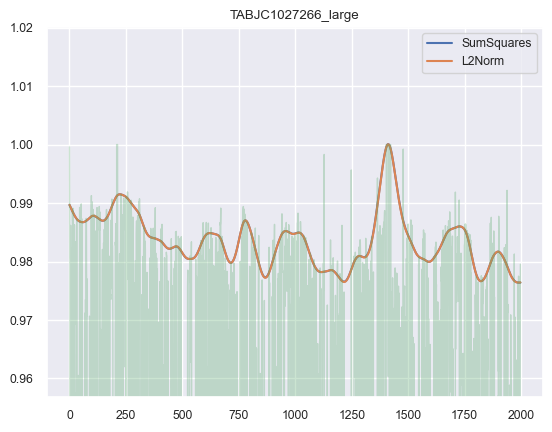

MAE s_hat  (OSD,CVX)   6.09e-04


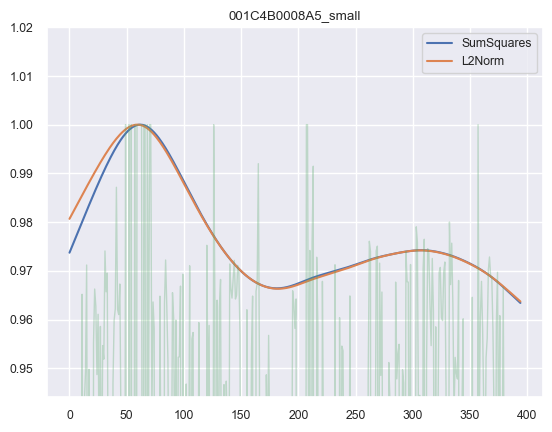

In [156]:
for fname in glob.glob(path):
    tc = cassandra_data[f"{fname}_tc"] 
        
    cvx_ss = cvx_sd(tc, tau=0.9, yearly_periodic=False,
                        c1=median_weight_tc, solver="MOSEK")

    cvx_l2n = cvx_sd_l2norm(tc, tau=0.9, c1=1e3,
                                yearly_periodic=False, solver="MOSEK")

    print(f'MAE s_hat  (OSD,CVX)   {mae(cvx_ss, cvx_l2n):.2e}')

    f, (ax1) = plt.subplots(1, 1, sharex=True)
    ax1.plot(cvx_ss, label="SumSquares")
    ax1.plot(cvx_l2n, label="L2Norm")
    ax1.plot(tc, alpha=0.3, linewidth=1)
    ax1.set_ylim(min(cvx_ss)*0.98, max(cvx_ss)*1.02)
    ax1.set_title(fname[24:-4])

    ax1.legend()
    plt.show()

# Conclusion

## TC new weight: 3352924

## DE new weight: 204697

Initial 1e3 identical weights for both cases were set as "good enough" it seems.

Left to do: check what weight needs to be for the sparsity filter in clear_day_detection.py (was median filter before).